In [1]:
import pandas as pd
dp=pd.read_csv("Womens Clothing E-Commerce Reviews.csv")

In [2]:
dp.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [7]:
import numpy as np
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid=SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\akash.kale\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [9]:
from sqlalchemy import true
dp['Review Text']=dp['Review Text'].replace(np.nan,'',regex=True)

In [15]:
sentiment_scores = []
for text in dp['Review Text']:
    scores = sid.polarity_scores(text)
    sentiment_scores.append(scores['compound'])

dp['Sentimentscore'] = sentiment_scores


In [26]:
def get_sentiment_label(Sentimentscore):
    if Sentimentscore>=0.05:
        return 'positive'
    elif Sentimentscore<=-0.05:
        return 'negative'
    else:
        return 'neutral'
sentiment_labels=dp['Sentimentscore'].apply(get_sentiment_label)
dp['Sentiment label']=sentiment_labels

In [27]:
dp.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Sentimentscore,Sentiment label
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,0.8932,positive
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,0.9729,positive
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,0.9427,positive
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,0.5727,positive
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,0.9291,positive


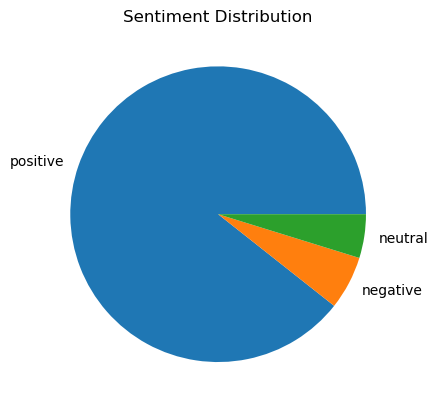

In [30]:
import matplotlib.pyplot as plt
sentiment_counts=dp['Sentiment label'].value_counts()
plt.pie(sentiment_counts,labels=sentiment_counts.index)
plt.title('Sentiment Distribution')
plt.show()

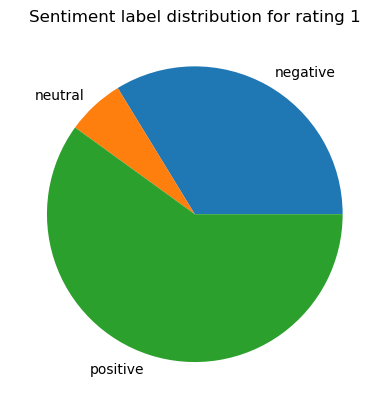

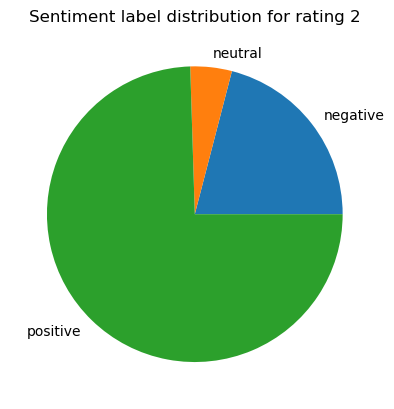

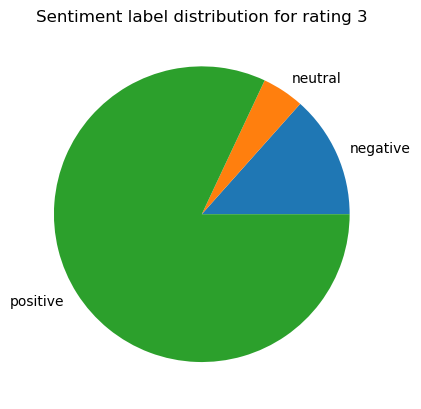

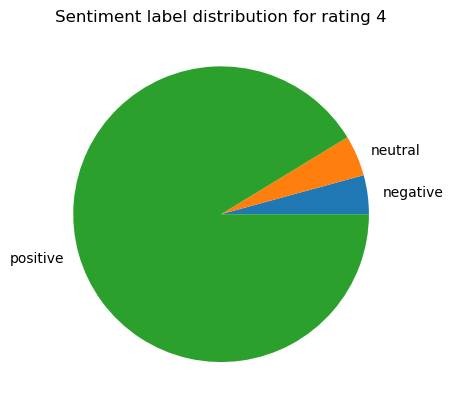

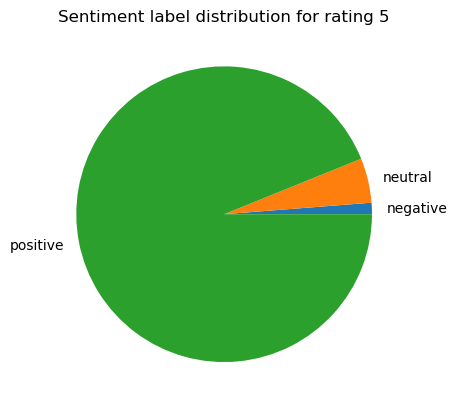

In [36]:
import matplotlib.pyplot as plt
grouped=dp.groupby(['Rating','Sentiment label']).size().reset_index(name='count')
for rating in range(1,6):
    data=grouped[grouped['Rating']==rating]
    plt.pie(data['count'],labels=data['Sentiment label'])
    plt.title(f'Sentiment label distribution for rating {rating}')
    plt.show()
